## <font color='#607c8e'>Startup's Success Analysis</font>
<font color='#cb416b'>Data Science Foundation Program BootCamp<br/></font>
Raquel Câmara Porto

<b>Objective: Predicting the profit of a new Startup based on certain features and deciding whether one should invest in a particular startup or not.</b>

### <font color='#3c4142'>Linear Regression</font>

At last, it is also possible to compare our models with a Linear Regression Model and see how they perform.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
(40, 6) (10, 6) (40,) (10,)
0.9610596256645947
0

<Figure size 800x640 with 0 Axes>

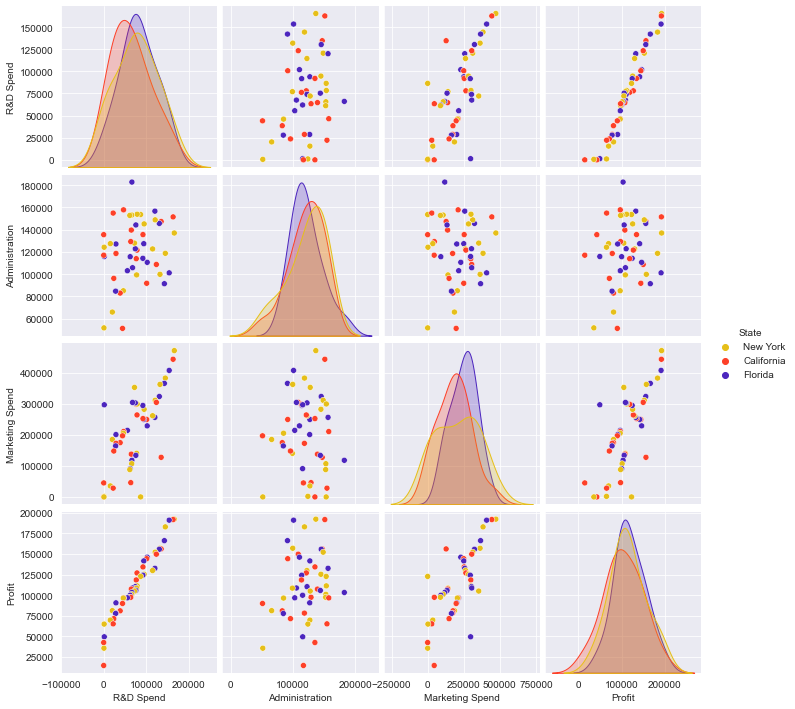

RMSE-original: 7206.286367965984
RMSE-test: 6560.3762149402555
RMSE-train: 7358.910924928157
MAE: 5532.748250000006


<Figure size 800x640 with 0 Axes>

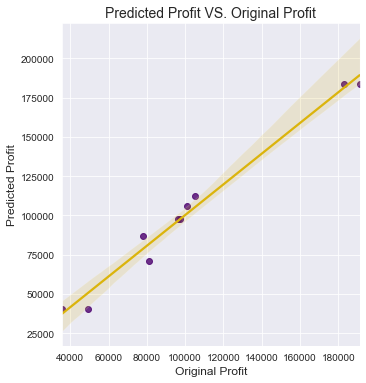

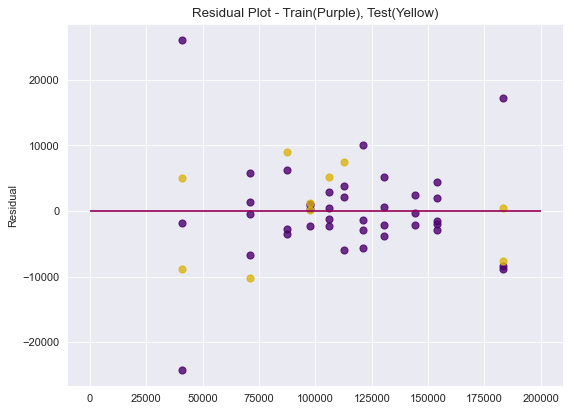

RMSE1: 6539.582084773609
RMSE2: 8542.21334860352
RMSE-train: 5934.2493275139595
MAE: 6259.642370170261


<Figure size 800x640 with 0 Axes>

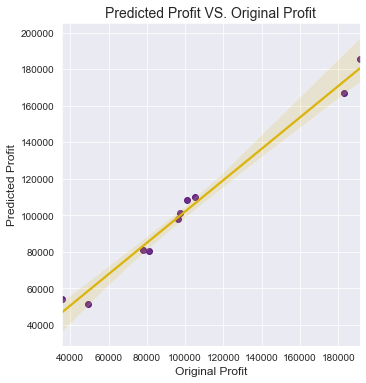

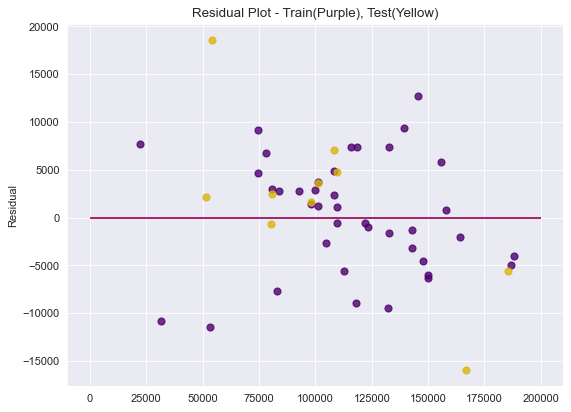

In [1]:
# importing variables and libs
from sklearn.linear_model import LinearRegression

%run "./2º Exploratory Data Analysis (EDA).ipynb"
%run "./3º Model Building.ipynb"
%run "./4º Graphical Analysis.ipynb"

In [2]:
#Creating the third model using Linear Regression
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression()

In [3]:
# Checking the scores of both training and testing samples
print(LR.score(X_train, Y_train))
print(LR.score(X_test, Y_test))

0.942446542689397
0.9649618042060633


Our Linear Regression Model is <b>generalized</b>.

In [4]:
# Predicting the values for the LR model
pred_test_LR = LR.predict(X_test)
pred_train_LR = LR.predict(X_train)

In [6]:
# RMSE for the entire dataset - for comparison purpose
rmse_lr = (np.sqrt(mean_squared_error(target_vals, LR.predict(features_vals))))
print('RMSE-original:', rmse_lr)

# RMSE for the prediction on the testing dataset
rmse_lr = (np.sqrt(mean_squared_error(Y_test, pred_test_LR)))
print('RMSE-test:', rmse_lr)

# RMSE for the prediction on the training dataset
rmse_lr = (np.sqrt(mean_squared_error(Y_train, pred_train_LR)))
print('RMSE-train:', rmse_lr)

# Mean Absolut Error
mae_lr = (np.mean(np.absolute(pred_test_LR - Y_test)))
print('MAE:', mae_lr)

RMSE-original: 8940.347124115397
RMSE-test: 8916.02161864093
RMSE-train: 8946.41816586839
MAE: 7698.119817483454


As the profit mean on the original dataset is 112012.64, we can conclude that our Decision Tree model has about <b>6.9%</b> of mean absolute error comparing with the dataset original mean.

In [7]:
# Turning the data into a new pandas Dataframe
LR_df = pd.DataFrame()
LR_df['pred_profit'] = pred_test_LR
LR_df['original_profit'] = Y_test
LR_df.head()

,pred_profit,original_profit
0,114664.417159,105008.31
1,90593.155316,96479.51
2,75692.841516,78239.91
3,70221.886797,81229.06
4,179790.255149,191050.39


<Figure size 800x640 with 0 Axes>

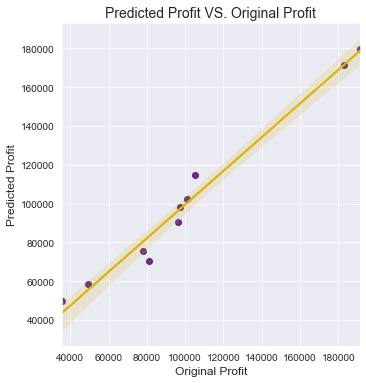

In [8]:
# Setting up the plotting
fig = plt.figure(figsize=(10,8), dpi=80)
sns.set_style('darkgrid')
sns.lmplot(data=LR_df, x='original_profit', y='pred_profit',
           line_kws={'color': '#dbb40c'}, scatter_kws={'color': '#4b006e'})
sns.despine(right=False, top=False)

plt.title('Predicted Profit VS. Original Profit', fontsize=14)
plt.xlabel('Original Profit', fontsize=12)
plt.ylabel('Predicted Profit', fontsize=12)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Saving the plot
plt.savefig("plots/predicted-vs-original-LR.png", dpi=300, bbox_inches='tight')
plt.show()

Finally, to see how the errors are distribuited, we can plot a <b>Residual</b> plot.

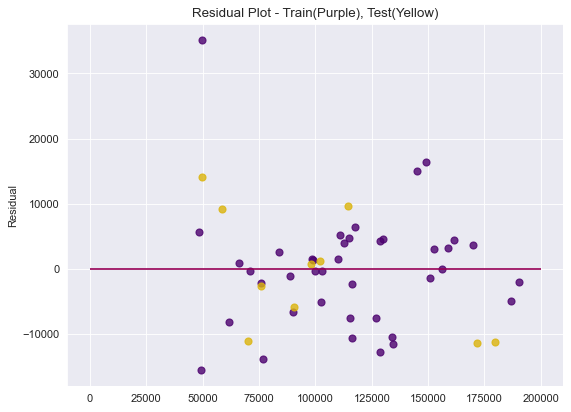

In [9]:
# Setting up the plotting
fig = plt.figure(figsize=(8,6), dpi=80)
plt.scatter(pred_train_LR, pred_train_LR - Y_train, c='#4b006e', s=40, alpha=0.8)
plt.scatter(pred_test_LR, pred_test_LR - Y_test, c='#dbb40c', s=40, alpha=0.8)

plt.hlines(y=0, xmin=0, xmax=200000, color='#960056')
plt.ylabel('Residual')
plt.title('Residual Plot - Train(Purple), Test(Yellow)')

# Saving the plot
plt.savefig("plots/residual-plot-LR.png", dpi=300, bbox_inches='tight')
plt.show()